In [ ]:
## 코랩에서 차트 한글 작업을 위해 실행해야함
!sudo apt-get -qq -y install fonts-nanum > /dev/null
!sudo fc-cache -fv
!sudo rm ~/.cache/matplotlib -rf

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/

In [ ]:
#### 도구-런타임 다시시작
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = [
  ['사과', '치즈', '생수'],
  ['생수', '호두', '치즈', '고등어'],
  ['수박', '사과', '생수'],
  ['생수', '호두', '치즈', '옥수수']
]

type(dataset)
dataset[0]

['사과', '치즈', '생수']

In [ ]:
## 리스트 자료 -> 연관분석 셋으로 변환

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

te = TransactionEncoder()
te.fit(dataset)
print(te.columns_)

te_ary = te.fit(dataset).transform(dataset)
te_ary

['고등어', '사과', '생수', '수박', '옥수수', '치즈', '호두']


array([[False,  True,  True, False, False,  True, False],
       [ True, False,  True, False, False,  True,  True],
       [False,  True,  True,  True, False, False, False],
       [False, False,  True, False,  True,  True,  True]])

In [ ]:
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,고등어,사과,생수,수박,옥수수,치즈,호두
0,False,True,True,False,False,True,False
1,True,False,True,False,False,True,True
2,False,True,True,True,False,False,False
3,False,False,True,False,True,True,True


In [ ]:
## 단일변수 지지도 계산

frequent_itemsets = apriori(df, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.50,(사과)
1,1.00,(생수)
2,0.75,(치즈)
3,0.50,(호두)
4,0.50,"(사과, 생수)"
5,0.75,"(치즈, 생수)"
6,0.50,"(호두, 생수)"
7,0.50,"(치즈, 호두)"
8,0.50,"(치즈, 호두, 생수)"


In [ ]:
## 지지도 하한성 정하기

frequent_itemsets = apriori(df, min_support=0.0, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.25,(고등어)
1,0.50,(사과)
2,1.00,(생수)
3,0.25,(수박)
4,0.25,(옥수수)
...,...,...
122,0.00,"(치즈, 사과, 옥수수, 호두, 생수, 고등어)"
123,0.00,"(치즈, 사과, 옥수수, 호두, 수박, 고등어)"
124,0.00,"(치즈, 생수, 옥수수, 호두, 수박, 고등어)"
125,0.00,"(치즈, 사과, 옥수수, 호두, 수박, 생수)"


In [ ]:
## item 조합 갯수가 특정갯수 이상의 item만 추출

print(frequent_itemsets[:3])
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets[frequent_itemsets['length'] <= 2]

   support itemsets
0     0.25    (고등어)
1     0.50     (사과)
2     1.00     (생수)


,support,itemsets,length
0,0.25,(고등어),1
1,0.50,(사과),1
2,1.00,(생수),1
3,0.25,(수박),1
4,0.25,(옥수수),1
5,0.75,(치즈),1
6,0.50,(호두),1
7,0.00,"(사과, 고등어)",2
8,0.25,"(생수, 고등어)",2
9,0.00,"(수박, 고등어)",2


In [ ]:
## 특정 아이템(치즈)이 포함된 것만 추출

frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: '치즈' in x)]

,support,itemsets,length
5,0.75,(치즈),1
11,0.25,"(치즈, 고등어)",2
16,0.25,"(치즈, 사과)",2
20,0.75,"(치즈, 생수)",2
23,0.00,"(치즈, 수박)",2
...,...,...,...
122,0.00,"(치즈, 사과, 옥수수, 호두, 생수, 고등어)",6
123,0.00,"(치즈, 사과, 옥수수, 호두, 수박, 고등어)",6
124,0.00,"(치즈, 생수, 옥수수, 호두, 수박, 고등어)",6
125,0.00,"(치즈, 사과, 옥수수, 호두, 수박, 생수)",6


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# metric 에는 지지도(support), 신뢰도(confidence), 향상도(lift) 사용가능
# 값의 최소옵션은 min_threshold에 기입함
# antecedents(전례: x값) / consequents(결과: y값)

rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)
rules

/usr/local/lib/python3.7/dist-packages/mlxtend/frequent_patterns/association_rules.py:105: RuntimeWarning: invalid value encountered in double_scalars
  "confidence": lambda sAC, sA, _: sAC/sA,


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(생수),(고등어),1.00,0.25,0.25,0.250000,1.000000,0.0000,1.000
1,(고등어),(생수),0.25,1.00,0.25,1.000000,1.000000,0.0000,inf
2,(치즈),(고등어),0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
3,(고등어),(치즈),0.25,0.75,0.25,1.000000,1.333333,0.0625,inf
4,(호두),(고등어),0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500
...,...,...,...,...,...,...,...,...,...
103,"(옥수수, 생수)","(치즈, 호두)",0.25,0.50,0.25,1.000000,2.000000,0.1250,inf
104,(치즈),"(생수, 옥수수, 호두)",0.75,0.25,0.25,0.333333,1.333333,0.0625,1.125
105,(호두),"(치즈, 옥수수, 생수)",0.50,0.25,0.25,0.500000,2.000000,0.1250,1.500
106,(옥수수),"(치즈, 호두, 생수)",0.25,0.50,0.25,1.000000,2.000000,0.1250,inf


In [ ]:
rules['antecedents'][0]

frozenset({'생수'})

In [ ]:
rules[(rules.iloc[:, 0] == frozenset({'사과'})) | (rules.iloc[:, 1] == frozenset({'사과'}))]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(사과),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
7,(생수),(사과),1.00,0.50,0.50,0.500000,1.000000,0.000,1.00
8,(사과),(수박),0.50,0.25,0.25,0.500000,2.000000,0.125,1.50
9,(수박),(사과),0.25,0.50,0.25,1.000000,2.000000,0.125,inf
10,(치즈),(사과),0.75,0.50,0.25,0.333333,0.666667,-0.125,0.75
11,(사과),(치즈),0.50,0.75,0.25,0.500000,0.666667,-0.125,0.50
46,"(생수, 수박)",(사과),0.25,0.50,0.25,1.000000,2.000000,0.125,inf
47,(사과),"(생수, 수박)",0.50,0.25,0.25,0.500000,2.000000,0.125,1.50
51,"(치즈, 생수)",(사과),0.75,0.50,0.25,0.333333,0.666667,-0.125,0.75
54,(사과),"(치즈, 생수)",0.50,0.75,0.25,0.500000,0.666667,-0.125,0.50


In [ ]:
# lift값이 가장 큰 값
te.columns_
for i in te.columns_:
  tmp = rules[rules.antecedents == {i}].sort_values(by='lift', ascending=False)
  tmp.to_csv(i + '.csv')

In [ ]:
!pip install apyori

In [ ]:
dataset = [
  ['사과', '치즈', '생수'],
  ['생수', '호두', '치즈', '고등어'],
  ['수박', '사과', '생수'],
  ['생수', '호두', '치즈', '옥수수']
]

In [ ]:
from apyori import apriori

result = list(apriori(dataset, min_support=0.01))
print(type(result))
df = pd.DataFrame(result)
df[:5]

<class 'list'>


,items,support,ordered_statistics
0,(고등어),0.25,"[((), (고등어), 0.25, 1.0)]"
1,(사과),0.50,"[((), (사과), 0.5, 1.0)]"
2,(생수),1.00,"[((), (생수), 1.0, 1.0)]"
3,(수박),0.25,"[((), (수박), 0.25, 1.0)]"
4,(옥수수),0.25,"[((), (옥수수), 0.25, 1.0)]"


In [ ]:
## 네트워크 그래프 그리기
!pip install networkx

In [ ]:
## 네트워크 그래프 기본 이해하기 https://95pbj.tistory.com/34
## 네트워크 그래프 https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.planar_layout.html

dataset = [
  ['사과', '치즈', '생수'],
  ['생수', '호두', '치즈', '고등어'],
  ['수박', '사과', '생수'],
  ['생수', '호두', '치즈', '옥수수']
]

from apyori import apriori

result = list(apriori(dataset, min_support=0.01))
df=pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['length'] == 2) & (df['support'] >= 0.01)].sort_values(by='support', ascending=False)

ar = df['items']
ar

15     (치즈, 생수)
10     (사과, 생수)
16     (호두, 생수)
19     (치즈, 호두)
7     (생수, 고등어)
8     (치즈, 고등어)
9     (호두, 고등어)
11     (사과, 수박)
12     (치즈, 사과)
13     (생수, 수박)
14    (옥수수, 생수)
17    (치즈, 옥수수)
18    (옥수수, 호두)
Name: items, dtype: object

In [ ]:
## Python의 NetworkX는 Link Analysis 알고리즘의 일부로 PageRank 알고리즘을 구현합니다.
## PageRank는 "(web)Page 의 순위(Rank)를 매기는 방법"을 말하며,
## page를 노드로 in-link, out-link를 edge로 고려하여 그래프를 만들고
## 그래프에 기반해 node의 순위를 매기는 방식
## 방향성이 있는 네트워크에서 노드의 영향력을 측정하는 방식
## PageRank 알고리즘: https://woono.tistory.com/189

## https://networkx.guide/algorithms/link-analysis/pagerank/
## https://frhyme.github.io/python-libs/nx_algo_link_Ana_pagerank/

import networkx as nx
G = nx.Graph()
G.add_edges_from(ar)

import numpy as np
pr = nx.pagerank(G)
pr

{'고등어': 0.1164109600759886,
 '사과': 0.12159024355676397,
 '생수': 0.22245604244398662,
 '수박': 0.08739386243408954,
 '옥수수': 0.1164109600759886,
 '치즈': 0.18532343446984545,
 '호두': 0.15041449694333728}

In [ ]:
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize)) # 스케일링, 표준화
print(nsize)

[1450.1405505  2000.          506.37981884  933.20920045  429.68501826
    0.          429.68501826]


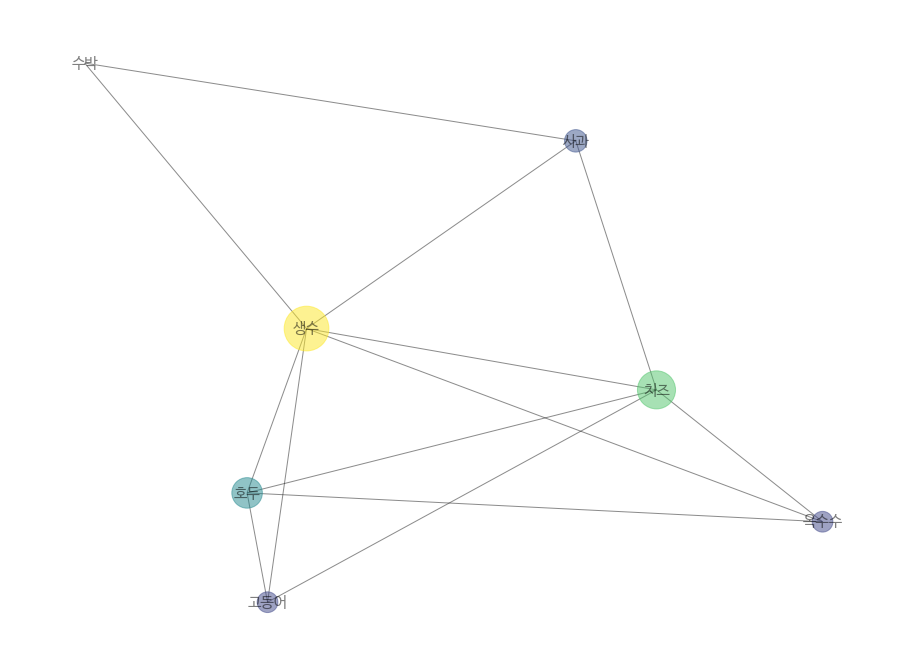

In [ ]:
# 한글폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.figure(figsize=(16, 12))
plt.axis('off')

fname = fm.FontProperties().get_name()
# alpha 값이 1이면 투명도 없음, 동그라미(노드)안의 글자의 투명도가 없음
# 0에 가까울수록 투명해지면서 아래의 선이 같이 표시됨

# edge_color='1' 이면 선색상 안나옴.
# camp=plt.cm.YIGN은 전체 색상톤

nx.draw_networkx(
  G, 
  node_color=list(pr.values()), 
  node_size=nsize, 
  alpha=0.5,
  edge_color='0.1',
  # cmap=plt.cm.YlGn,
  font_family=fname,
  font_size=15
)

In [ ]:
## 연관분석 실전
## 데이터설명: 베이커리에서 판매된 상품의 트랜잭션 기록 데이터
## 변수: Date(판매일자) / Time(판매시간) / Transaction(고객번호) / Item(판매상품)
## 판매일자: 2016.10.30 - 2017.04.09
## https://programmer-ririhan.tistory.com/190

df = pd.read_csv('/content/drive/MyDrive/dataAnalysis/data/BreadBasket_DMS.csv')
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [ ]:
df.isna().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [ ]:
# 판매빈도수 상위 15개
tmp = df['Item'].value_counts()[:15]
tmp

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
NONE              786
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Juice             369
Alfajores         369
Name: Item, dtype: int64

<BarContainer object of 15 artists>

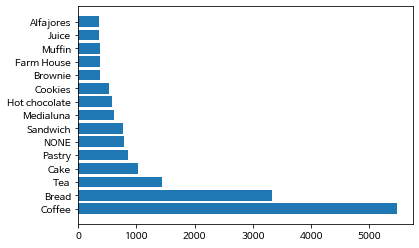

In [ ]:
import matplotlib.pyplot as plt
plt.barh(tmp.index, tmp)

Coffee           0.256939
Bread            0.156155
Tea              0.067393
Cake             0.048138
Pastry           0.040201
NONE             0.036914
Sandwich         0.036209
Medialuna        0.028930
Hot chocolate    0.027709
Cookies          0.025360
Brownie          0.017799
Farm House       0.017564
Muffin           0.017377
Juice            0.017330
Alfajores        0.017330
Name: Item, dtype: float64


<BarContainer object of 15 artists>

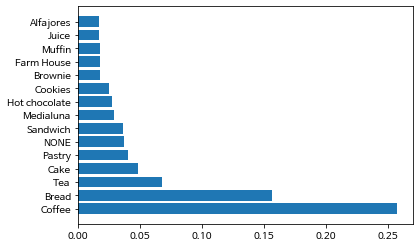

In [ ]:
# 판매빈도수 상위 15개 % 계산 및 차트
tmp = df['Item'].value_counts()
tmp1 = tmp[:15] / len(df)
print(tmp1)

plt.barh(tmp1.index, tmp1)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         21293 non-null  datetime64[ns]
 1   Time         21293 non-null  object        
 2   Transaction  21293 non-null  int64         
 3   Item         21293 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 665.5+ KB


In [ ]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day_name'] = df['Date'].dt.day_name()
df['hour'] = df['Time'].str.split(':').str[0].astype(int)
df.head()

,Date,Time,Transaction,Item,year,month,day_name,hour
0,2016-10-30,09:58:11,1,Bread,2016,10,Sunday,9
1,2016-10-30,10:05:34,2,Scandinavian,2016,10,Sunday,10
2,2016-10-30,10:05:34,2,Scandinavian,2016,10,Sunday,10
3,2016-10-30,10:07:57,3,Hot chocolate,2016,10,Sunday,10
4,2016-10-30,10:07:57,3,Jam,2016,10,Sunday,10


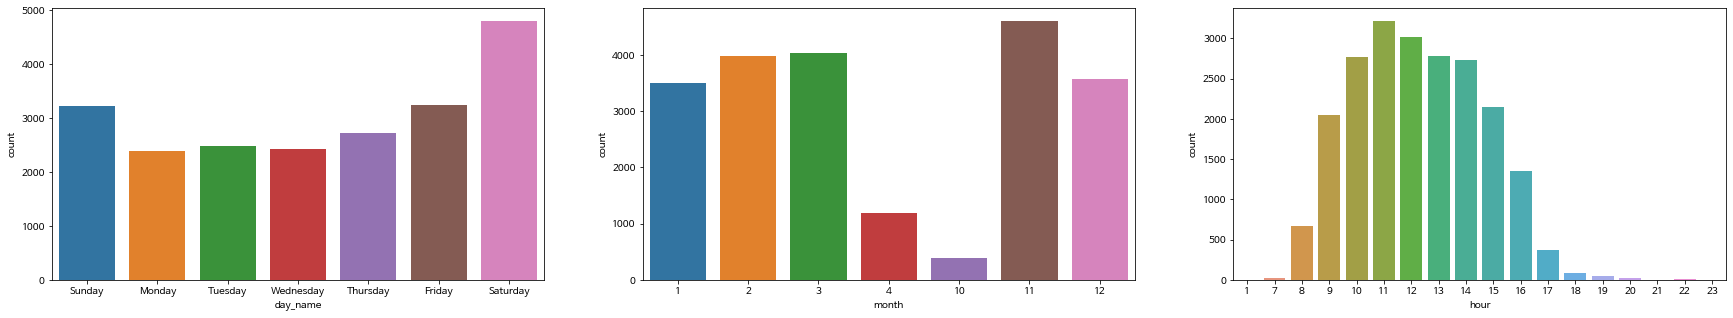

In [ ]:
## 베이커리 손님 대부분이 토요일
## 데이터가 2016.10.30 - 2017.04.09 사이의 데이터이기 떄문에 4월과 10월의 데이터가 적을 수 밖에 없음
## 오전 8시에서 오후 5시 사이에 분포함을 볼 수 있으며, 특히 오전 11시 경에 손님이 가장 붐빔

plt.figure(figsize=(30, 5))
import seaborn as sns

plt.subplot(1,3,1)
sns.countplot(x='day_name', data=df)

plt.subplot(1,3,2)
sns.countplot(x='month', data=df)

plt.subplot(1,3,3)
sns.countplot(x='hour', data=df)

In [ ]:
### 고객번호 최대값 확인
cnt = df['Transaction'].max()
cnt
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         21293 non-null  datetime64[ns]
 1   Time         21293 non-null  object        
 2   Transaction  21293 non-null  int64         
 3   Item         21293 non-null  object        
 4   year         21293 non-null  int64         
 5   month        21293 non-null  int64         
 6   day_name     21293 non-null  object        
 7   hour         21293 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 1.3+ MB


In [ ]:
## 데이터프레임 list로 변경

df_tmp = df[['Transaction', 'Item']]
df_tmp_arr = [[] for i in range(cnt + 1)]
num = 0

for i in df_tmp['Item']:
  df_tmp_arr[df_tmp['Transaction'][num]].append(i)
  num += 1

df_tmp_arr[9683]

['Coffee', 'Pastry']

In [ ]:
df[df['Transaction'] == 5]

,Date,Time,Transaction,Item,year,month,day_name,hour
7,2016-10-30,10:13:03,5,Coffee,2016,10,Sunday,10
8,2016-10-30,10:13:03,5,Pastry,2016,10,Sunday,10
9,2016-10-30,10:13:03,5,Bread,2016,10,Sunday,10


In [ ]:
df_tmp_arr.pop(0) # 0번 고객데이터가 없음
num = 0

for i in df_tmp_arr:
  df_tmp_arr[num] = list(set(df_tmp_arr[num])) # set은 중복제거하는 파이썬 내부명령어, 인덱싱이 불가능해서 list 구조로 변경해야함.
  num += 1

df_tmp_arr[:15]

[['Bread'],
 ['Scandinavian'],
 ['Cookies', 'Hot chocolate', 'Jam'],
 ['Muffin'],
 ['Bread', 'Coffee', 'Pastry'],
 ['Medialuna', 'Muffin', 'Pastry'],
 ['Tea', 'Coffee', 'Medialuna', 'Pastry'],
 ['Bread', 'Pastry'],
 ['Bread', 'Muffin'],
 ['Medialuna', 'Scandinavian'],
 ['Bread', 'Medialuna', 'NONE'],
 ['Tea', 'Tartine', 'Coffee', 'Jam', 'Pastry'],
 ['Bread', 'Coffee', 'Basket'],
 ['Bread', 'Medialuna', 'Pastry'],
 ['Mineral water', 'Scandinavian', 'NONE']]

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_ary = te.fit(df_tmp_arr).transform(df_tmp_arr)
df = pd.DataFrame(te_ary, columns=te.columns_)
# df.info()
len(df.columns)

95

In [ ]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.319806,(Bread)
1,0.101508,(Cake)
2,0.467575,(Coffee)
3,0.139405,(Tea)


In [ ]:
# 지지도(Support): 전체 항목 중(행들 중) x와 y를 모두 포함하는 경우의 비율
# 신뢰도(Confidence): x가 있을 때 y도 있는 비율(조건부 확률)
support_list = [0.005, 0.01, 0.05, 0.1]
con_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

total = []
for i in support_list:
  frequent_itemsets = apriori(df, min_support=i, use_colnames=True)
  row = []
  for j in con_list:
    tmp = association_rules(frequent_itemsets, metric='confidence', min_threshold=j)
    row.append(len(tmp))
  total.append(row)

total

[[118, 61, 38, 28, 19, 4, 2, 1, 0],
 [42, 30, 18, 15, 12, 1, 1, 0, 0],
 [4, 2, 1, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [ ]:
total[0]

[118, 61, 38, 28, 19, 4, 2, 1, 0]

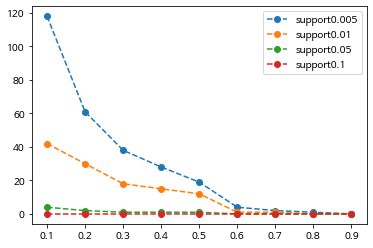

In [ ]:
## 지지도 10%, 5%의 경우 생성되는 규칙이 매우 적음
## 지지도 0.5%의 경우 생성되는 규칙이 너무 많음
## 적정선인 지지도 1%를 선택하고자함
## 최소 50%의 신뢰도에서 15개 정도의 규칙이 생성되므로
## 그 이상으로 신뢰도를 선택하고자함

con_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
support_list = [0.005, 0.01, 0.05, 0.1]

for y, name in zip(total, support_list):
  plt.plot(con_list, y, 'o', linestyle='dashed', label='support' + str(name))
  plt.legend()

In [ ]:
## 최소 지지도 1%(0.01), 최소 신뢰도 50%(0.05) 이상인 연관 규칙들을 생성

frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.05)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alfajores),(Bread),0.035523,0.319806,0.010120,0.284884,0.890802,-0.001241,0.951166
1,(Alfajores),(Coffee),0.035523,0.467575,0.019207,0.540698,1.156386,0.002597,1.159203
2,(Brownie),(Bread),0.039137,0.319806,0.010533,0.269129,0.841540,-0.001983,0.930663
3,(Bread),(Cake),0.319806,0.101508,0.022821,0.071359,0.702995,-0.009642,0.967535
4,(Cake),(Bread),0.101508,0.319806,0.022821,0.224822,0.702995,-0.009642,0.877468


In [ ]:
## 신뢰도 값으로 확인
rules.sort_values(by='confidence', ascending=False)[:10]

# 해석
# Toast를 산 손님의 70%가(confidence)가  coffee를 구매하였음
# spanish Brunch를 산 손님의 60%가 coffee를 구해였음.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
45,(Toast),(Coffee),0.032838,0.467575,0.023131,0.704403,1.506500,0.007777,1.801181
42,(Spanish Brunch),(Coffee),0.017761,0.467575,0.010636,0.598837,1.280729,0.002331,1.327203
32,(Medialuna),(Coffee),0.060409,0.467575,0.034387,0.569231,1.217410,0.006141,1.235986
37,(Pastry),(Coffee),0.084159,0.467575,0.046468,0.552147,1.180873,0.007118,1.188839
1,(Alfajores),(Coffee),0.035523,0.467575,0.019207,0.540698,1.156386,0.002597,1.159203
30,(Juice),(Coffee),0.037691,0.467575,0.020136,0.534247,1.142589,0.002513,1.143147
35,(NONE),(Coffee),0.077757,0.467575,0.041409,0.532537,1.138932,0.005051,1.138965
38,(Sandwich),(Coffee),0.070219,0.467575,0.037381,0.532353,1.138539,0.004549,1.138518
21,(Cake),(Coffee),0.101508,0.467575,0.053490,0.526958,1.127002,0.006028,1.125534
40,(Scone),(Coffee),0.033767,0.467575,0.017658,0.522936,1.118399,0.001869,1.116044


In [ ]:
# 향상도값으로 확인
rules.sort_values(by='lift', ascending=False)[:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
22,(Hot chocolate),(Cake),0.057001,0.101508,0.011152,0.195652,1.927463,0.005366,1.117045
23,(Cake),(Hot chocolate),0.101508,0.057001,0.011152,0.109868,1.927463,0.005366,1.059392
47,(NONE),(Tea),0.077757,0.139405,0.017968,0.231076,1.657583,0.007128,1.119219
46,(Tea),(NONE),0.139405,0.077757,0.017968,0.128889,1.657583,0.007128,1.058697
24,(Tea),(Cake),0.139405,0.101508,0.023234,0.166667,1.641913,0.009084,1.078191
25,(Cake),(Tea),0.101508,0.139405,0.023234,0.228891,1.641913,0.009084,1.116048
45,(Toast),(Coffee),0.032838,0.467575,0.023131,0.704403,1.506500,0.007777,1.801181
53,(Pastry),"(Bread, Coffee)",0.084159,0.087980,0.010946,0.130061,1.478303,0.003542,1.048373
50,"(Bread, Coffee)",(Pastry),0.087980,0.084159,0.010946,0.124413,1.478303,0.003542,1.045973
49,(Tea),(Sandwich),0.139405,0.070219,0.014044,0.100741,1.434667,0.004255,1.033941


In [ ]:
!pip install apyori
!pip install networkx

In [ ]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
tmp = frequent_itemsets[frequent_itemsets['length'] == 2]
tmp

,support,itemsets,length
31,0.010120,"(Alfajores, Bread)",2
32,0.019207,"(Alfajores, Coffee)",2
33,0.010533,"(Bread, Brownie)",2
34,0.022821,"(Bread, Cake)",2
35,0.087980,"(Bread, Coffee)",2
36,0.014147,"(Bread, Cookies)",2
37,0.013114,"(Bread, Hot chocolate)",2
38,0.016522,"(Bread, Medialuna)",2
39,0.020240,"(Bread, NONE)",2
40,0.028501,"(Bread, Pastry)",2


In [ ]:
ar = tmp['itemsets']

import networkx as nx
G = nx.Graph()
G.add_edges_from(ar)

import numpy as np
pr = nx.pagerank(G)
pr

{'Alfajores': 0.03401795402080666,
 'Bread': 0.15867559974217835,
 'Brownie': 0.03401795402080666,
 'Cake': 0.05965950792278901,
 'Coffee': 0.2684748359987527,
 'Cookies': 0.03401795402080666,
 'Hot chocolate': 0.04669568599129706,
 'Juice': 0.02175683145976124,
 'Medialuna': 0.03401795402080666,
 'Muffin': 0.02175683145976124,
 'NONE': 0.046428929913718595,
 'Pastry': 0.03401795402080666,
 'Sandwich': 0.046428929913718595,
 'Scone': 0.02175683145976124,
 'Soup': 0.02175683145976124,
 'Spanish Brunch': 0.02175683145976124,
 'Tea': 0.07300575165494495,
 'Toast': 0.02175683145976124}

In [ ]:
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))
print(len(nsize))

18


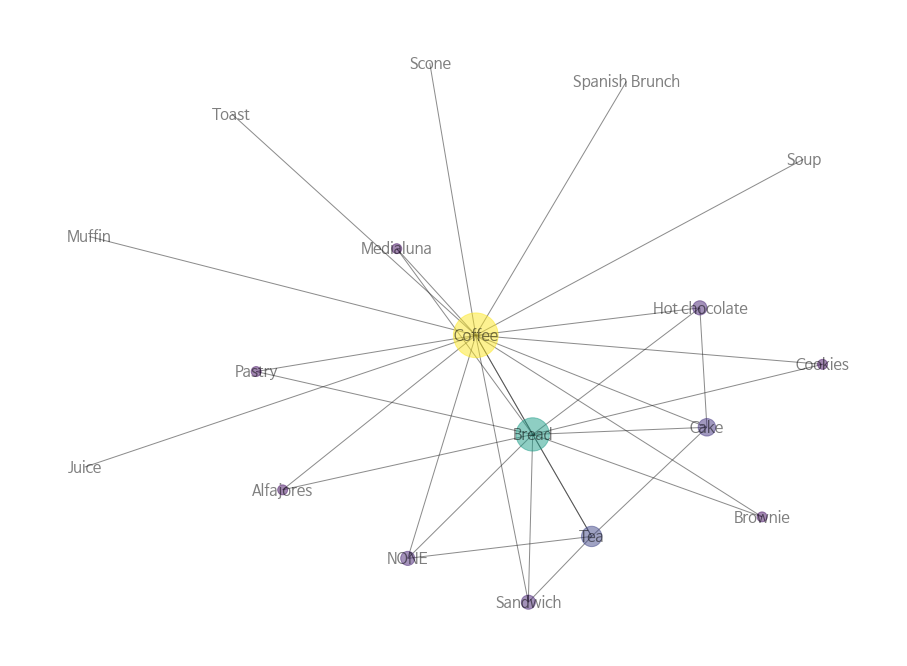

In [ ]:
# 한글폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.figure(figsize=(16, 12))
plt.axis('off')

fname = fm.FontProperties().get_name()

nx.draw_networkx(
  G, 
  node_color=list(pr.values()), 
  node_size=nsize, 
  alpha=0.5,
  edge_color='0.1',
  # cmap=plt.cm.YlGn,
  font_family=fname,
  font_size=15
)